In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data.getSyntheticData as data
from models.OCSMM import OCSMM
from utils.gridSearch import *


In [2]:
def plot_data(Stest, scores):
    scores = np.squeeze(scores)
    score_plot = [np.array([sc]*Splot[idx].shape[0]) for idx, sc in enumerate(scores)]
    mini, maxi = -2.5, 2.5
    norm = plt.Normalize(mini, maxi)
    
    fig, axes = plt.subplots(2, 6, figsize=(15, 4.5), sharey=True)
    idx=0
    for ax in axes.flat:
        ax.scatter(Splot[idx][:,0], Splot[idx][:,1], 
                         c=score_plot[idx], cmap='viridis', norm=norm)
        idx+=1
        
    for a, color in zip([axes[1][9%6], axes[1][10%6], axes[1][11%6]], ['green', 'red', 'purple']):
        plt.setp(a.spines.values(), color=color, ls=':')
        plt.setp([a.get_xticklines(), a.get_yticklines()], color=color, ls=':')
    
    fig.tight_layout()
    fig.colorbar(plt.gca().get_children()[0], ax=axes.ravel().tolist()).set_label('Anomaly Score')
    plt.show()


In [3]:
# Generate Data

Strain = data.genSyntheticTrainData(n_sample=100, n_sets=50)
Stest, Ytest = data.getSyntheticTestData(n_sample=100, n_sets=100)

Splot = data.genSyntheticTrainData(n_sample=100, n_sets=9)
X_anomaly1 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
X_anomaly2 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
X_anomaly3 = np.random.multivariate_normal(mean = [0, 0], cov = np.identity(2), size=100)
# X_anomaly2 = data.genSyntheticSet(100, pmix=[0.33, 0.64, 0.03])
# X_anomaly3 = data.genSyntheticSet(100, pmix=[0.84, 0.08, 0.08])
Splot.extend([X_anomaly1, X_anomaly2, X_anomaly3])


     pcost       dcost       gap    pres   dres
 0:  4.0168e-01 -5.1899e+01  2e+02  1e+00  1e-15
 1:  4.1268e-01 -1.4548e+01  1e+01  3e-16  2e-15
 2:  4.1211e-01 -1.4537e-01  6e-01  2e-16  3e-15
 3:  3.9806e-01  2.4572e-01  2e-01  1e-16  9e-16
 4:  3.9219e-01  3.5975e-01  3e-02  2e-16  7e-16
 5:  3.8797e-01  3.6134e-01  3e-02  2e-16  6e-16
 6:  3.7974e-01  3.7850e-01  1e-03  2e-16  8e-16
 7:  3.7913e-01  3.7910e-01  3e-05  2e-16  8e-16
 8:  3.7911e-01  3.7911e-01  3e-07  2e-16  9e-16
Optimal solution found.


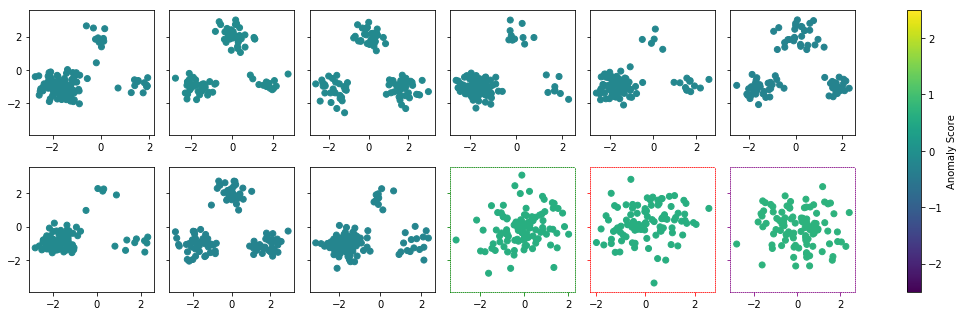

In [4]:
# Test plot
C = 1
gamma = 1
clf = OCSMM(Strain, C, gamma)
clf.fit()
scores = clf.decision_function(Splot)
plot_data(Splot, scores)


In [ ]:
# Test Gridsearch
gammas = [0.4, 0.5, 1, 2, 3]
Cs = [1, 4, 5, 6]
grids = {'gammas': gammas, 'Cs': Cs}
performance = gridSearch(Strain, Stest, Ytest, grids)
performance

In [ ]:
C = 4
gamma = 3
clf = OCSMM(Strain, C, gamma)
clf.fit()
sc = clf.decision_function(Splot)
p_values = empirical_p_values(sc)
# auc, best_cut = roc_auc([0,0,0,0,0,0,0,0,0,1,1,1], p_values)
# Ypred = (p_values < best_cut)*1

plot_data(Splot, np.exp(sc))
# plot_data(Splot, np.exp(p_values))
# plot_data(Splot, Ypred)

In [ ]:
C = 1
gamma = 1
clf = OCSMM(Strain, C, gamma)
clf.fit()
scores = clf.decision_function(Stest)
# plot_data(Splot, scores)
p_values = empirical_p_values(scores)
auc, best_cut, roc_curve = roc_auc(Ytest, p_values)


gammas = [0.4, 0.5, 1, 2, 3]
Cs = [1, 4, 5]
for C in Cs:
    for gamma in gammas:
        clf = OCSMM(Strain, C, gamma)
        clf.fit()
        scores = clf.decision_function(Stest)
        # plot_data(Splot, scores)
        p_values = empirical_p_values(scores)
        auc, best_cut, roc_curve = roc_auc(Ytest, p_values)
        plt.plot(roc_curve[:,1], roc_curve[:,0], 
             label='(C:%f,gamma:%f)'% (np.round(C,1),np.round(gamma,2)))
# plt.legend()
plt.show()


In [ ]:
roc_curve.shape